# Шаг 1, загрузка картинки и получение выделенных областей с текстом и иная предобработка.

In [1]:
from bb_text_extractor import get_masked_image

from PIL import Image


C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\convert\layer.py:30: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:212.)
  layer.weight.data = torch.from_numpy(numpy_helper.to_array(weight))
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\convert\attribute.py:101: UserWarning: Pytorch's interpolate uses no coordinate_transformation_mode=asymmetric. Result might differ.
  warnings.warn(
C:\Users\Никита\AppData\Roaming\Python\Python39\site-packages\onnx2pytorch\operations\resize.py:16: UserWarning: Pytorch's interpolat

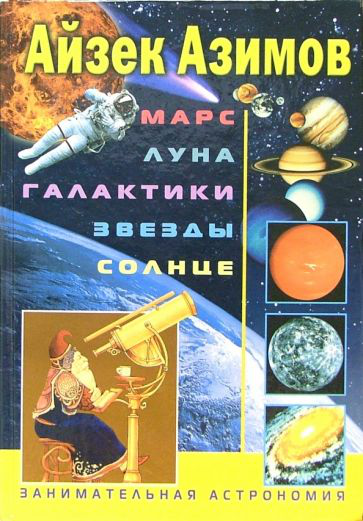

In [2]:
# image = Image.open('pics/1010629.png').convert("RGB")
image = Image.open('pics/23747.png').convert("RGB")
# image = Image.open("pics/35294.png").convert("RGB")
image


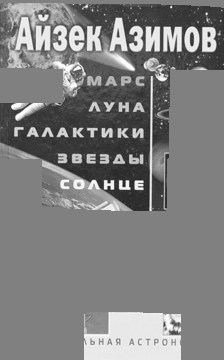

In [3]:
masked_image = get_masked_image(image, mask_padding=25)
masked_image


# Шаг 2, получение текста с картинки.

***необходимо сохранить картинку на диск для загрузки её в ocr***

In [4]:
masked_image.save("test_pic.png")

In [5]:
from yandex_ocr import get_yandex_ocr

In [6]:
text = get_yandex_ocr("test_pic.png").strip().lower().replace("\n", " ")
text


'айзек азимов d vha лактики звезды 3th ьная астрон'

# Шаг 3, исправление опечаток с помощью Mixtral.

In [7]:
from llm import Mixtral, llm

mixtral = Mixtral.from_llm(llm, verbose=False)


In [8]:
res = mixtral.text_normalization(text)
text = res.content.strip().replace("\n", " ")
print(text)


Isaac Asimov The Naked Sun


# Шаг 4, поиск информации по книге в базе с помощью tf-idf.

In [9]:
from tf_idf_search import cosine_search

In [10]:
row_data = cosine_search(text)
row_data


id                                                        965550
link                       https://www.labirint.ru/books/965550/
name                                     Tzu Sun: The Art of War
rate                                                        10.0
description    'The Commander stands for the virtues of wisdo...
reviews                                                     None
Name: 6139, dtype: object

# Шаг 5, краткий пересказ начала книги и суммаризация отзывов с помощью Mixtral.

In [11]:
description = (
    row_data["description"] if row_data["description"] else "Описание отсутствует"
)

reviews = row_data["reviews"].split(";\n") if row_data["reviews"] else ""


In [16]:
row_data

id                                                        965550
link                       https://www.labirint.ru/books/965550/
name                                     Tzu Sun: The Art of War
rate                                                        10.0
description    'The Commander stands for the virtues of wisdo...
reviews                                                     None
Name: 6139, dtype: object

In [20]:
row_data['name'], row_data['rate'], row_data['link']

('Tzu Sun: The Art of War', 10.0, 'https://www.labirint.ru/books/965550/')

In [12]:
res = mixtral.reviews_summary(description=description, reviews=reviews)
print(res.content)


 Обзор книги "The Art of War"

"The Art of War" - древнекитайский трактат о военной стратегии, автором которого считается Сунь-цзы. За более чем 2000 лет своего существования, эта книга неоднократно изучалась военными командирами, а также лидерами из сфер бизнеса, политики, спорта и многих других областей.

Книга содержит лаконичные и ясные аксиомы, которые предоставляют ясные уроки о том, что должен учитывать выдающийся стратег, включая планирование, тактику и ее изменение, сохранение энергии своих сил, повышение морального духа и оценку своих противников.

Одним из ключевых аспектов книги является представление о лидерe - "Командире", который должен представлять собой образец добродетелей, таких как мудрость, искренность, доброта, мужество и строгость.

Книга красиво иллюстрирована произведениями искусства из китайской античности, что делает ее не только полезной, но и увлекательной для чтения.

Однако, стоит отметить, что несмотря на свою древность, учения из "The Art of War" всё ещ